###### Data Description :

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

###### Importing the Libraries:

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN
import sklearn
from IPython.display import Markdown, display

###### Acquiring the data:

In [541]:
data=pd.read_excel("census_income.xlsx")

In [542]:
#df=pd.DataFrame(data, columns=data.columns)
#df.head(15)

In [543]:
data.shape

(32560, 15)

In [544]:
#Lets check the column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [545]:
#Statistical Summary:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [546]:
data.describe(include='object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


Lets check for the categorical columns and continuous columns

In [547]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [548]:
for col in data.select_dtypes(include='object').columns:
    print("Value counts for column :",col)
    print(data[col].value_counts())
    print('\n')

Value counts for column : Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Value counts for column : Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Value counts for column : Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse  

###### Missing Values ('?')
    We see, there are 1836 ('?')missing values in Workclass, 1843 ('?')missing values in Occupation and 583 ('?') missing values in Native_country columns.
    Lets fill the missing values("?") by mode value of the respective columns.

In [549]:
data["Workclass"]=data["Workclass"].str.replace("?", "Private", regex=True)

In [550]:
data["Workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [551]:
data["Occupation"]=data["Occupation"].str.replace("?", "Prof-specialty", regex=True)

In [552]:
data["Occupation"].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [553]:
data["Native_country"]=data["Native_country"].str.replace("?", "United-States", regex=True)

In [554]:
data["Native_country"].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

###### EDA :

In [555]:
Edu_level = pd.crosstab(data["Education"], data["Education_num"],margins=True).drop_duplicates()

#df=pd.crosstab(data["Qualification"], data["Profile"], margins=True)
#df.head(20)

In [556]:
Edu_level

Education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
Education,,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0,933
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0,1175
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0,433
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0,333
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0,646
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0,514
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0,1067
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0,1382


Education_num was extracted from Education column. Hence we can drop Education Column from our dataset as we already have the relevant data in education_num column.

###### Education Vs Income :

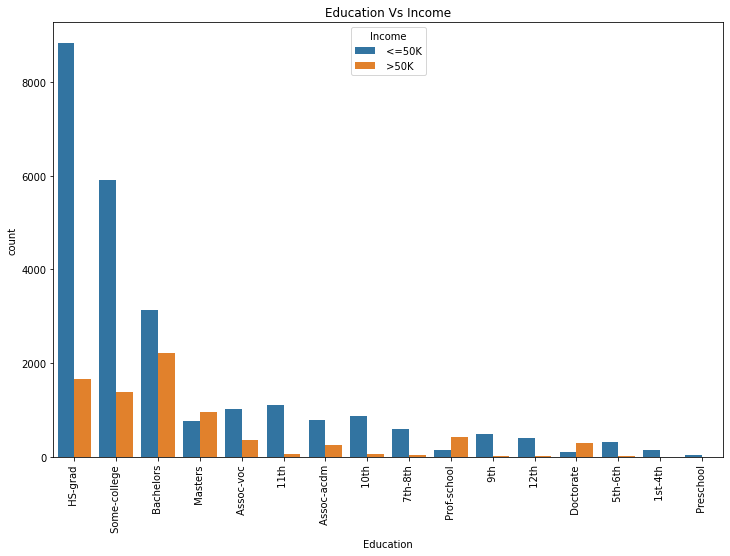

In [557]:
plt.figure(figsize= (12,8))
plt.title("Education Vs Income")
sns.countplot(x=data["Education"], hue=data["Income"], order=data["Education"].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

By looking at the graph above, we see that whoever has Bachelors are earning more comapred to other education levels. But the density of people income having <=50k is more compared to income of >50K
The frequency Masters, Prof-School and Doctorates are earning more than 50K.

###### Workclass Vs Income :

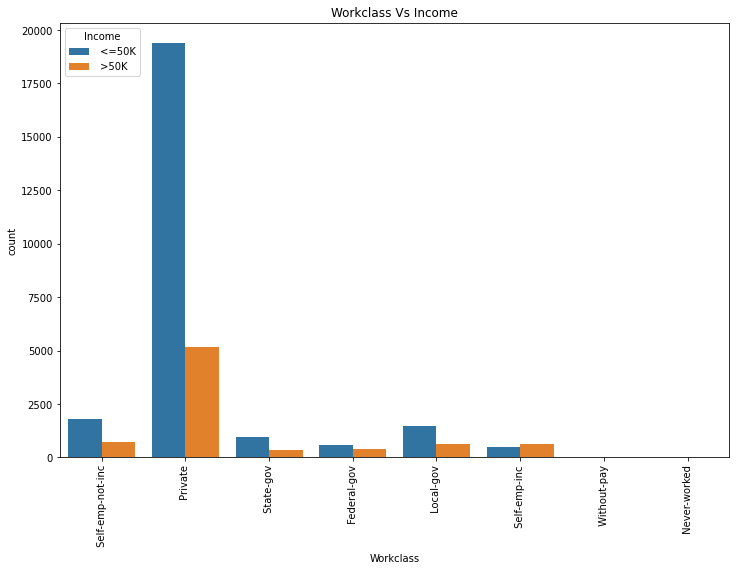

In [558]:
plt.figure(figsize= (12,8))
plt.title("Workclass Vs Income")
sns.countplot(x=data["Workclass"], hue=data["Income"])
plt.xticks(rotation='vertical')
plt.show()

Most of the self-emp-inc are earning more than 50K and most of the private work class population is earning less than 50K

###### Age Vs Income :

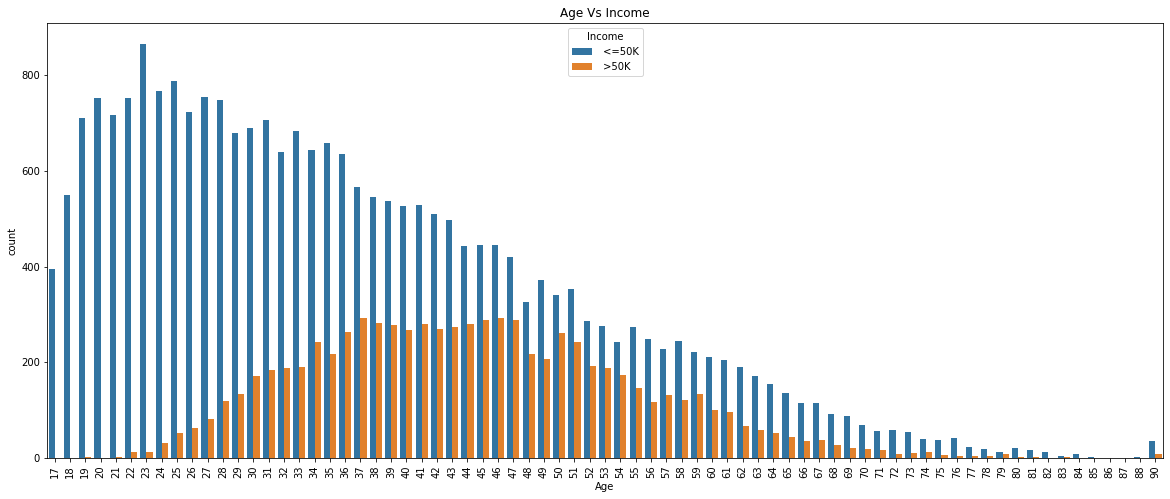

In [559]:
plt.figure(figsize= (20,8))
plt.title("Age Vs Income")
sns.countplot(x=data["Age"], hue=data["Income"])
plt.xticks(rotation='vertical')
plt.show()

The age between 30 and 60 are more likely to earn >50K and the age group below 30 to 17 are more likely to earn <=50K.

###### Occupation Vs Income :

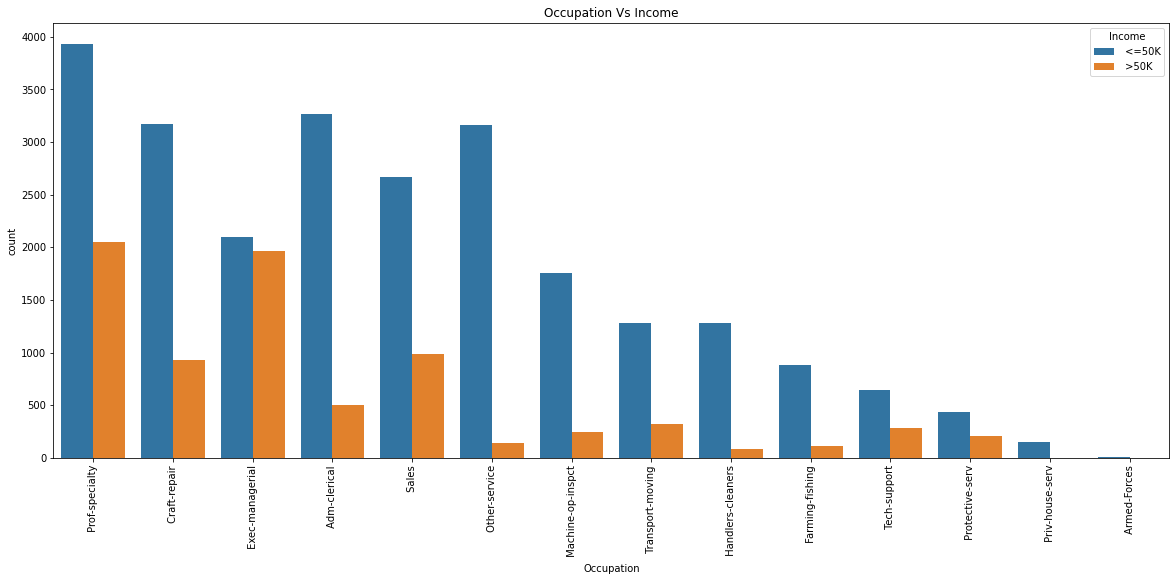

In [560]:
plt.figure(figsize= (20,8))
plt.title("Occupation Vs Income")
sns.countplot(x=data["Occupation"], hue=data["Income"], order = data["Occupation"].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

None of the Priv-house-serv and Armed-Forces are earnning >50K.

###### Relationship Vs Income : 

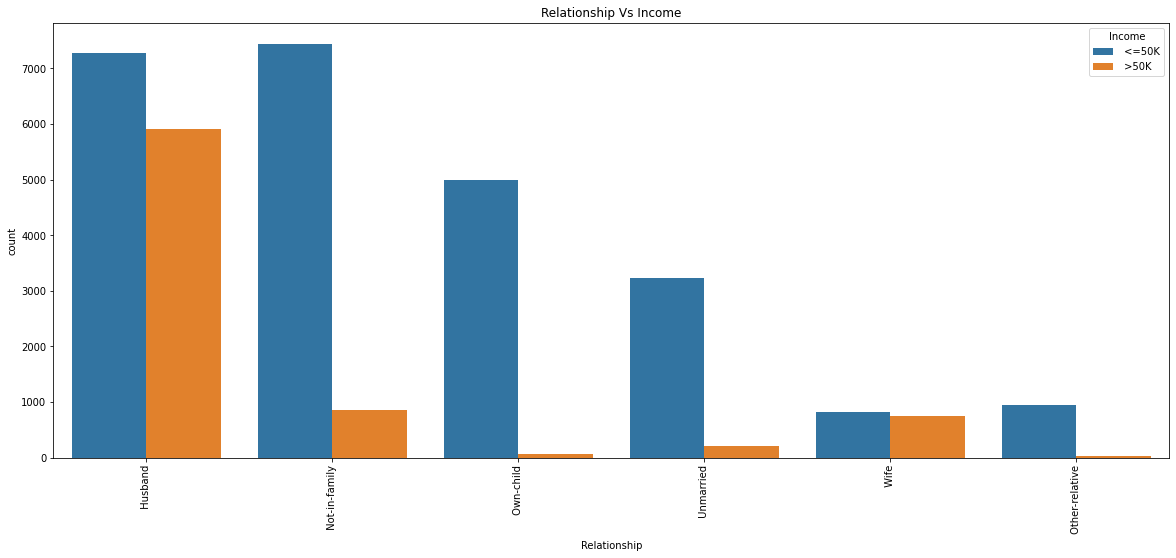

In [561]:
plt.figure(figsize= (20,8))
plt.title("Relationship Vs Income")
sns.countplot(x=data["Relationship"], hue=data["Income"], order = data["Relationship"].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

###### Marital_status Vs Income :

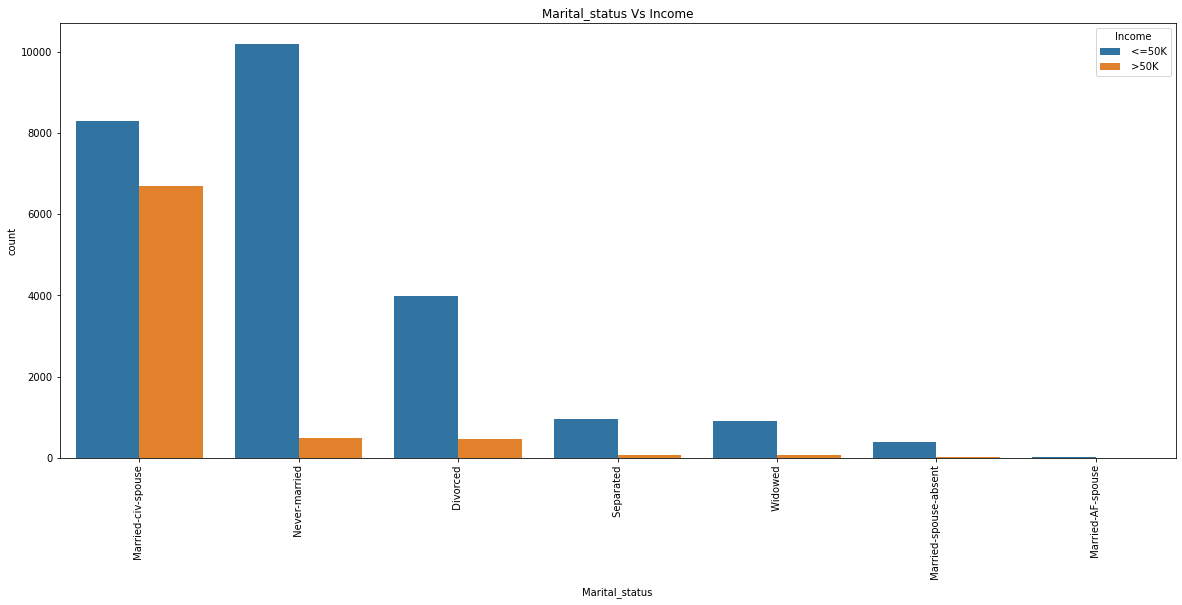

In [562]:
plt.figure(figsize= (20,8))
plt.title("Marital_status Vs Income")
sns.countplot(x=data["Marital_status"], hue=data["Income"], order = data["Marital_status"].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

Married-civ-spouse are mostlikely to earn >50K and Never-married group has most likely to earn <=50K.

###### Race Vs Income:

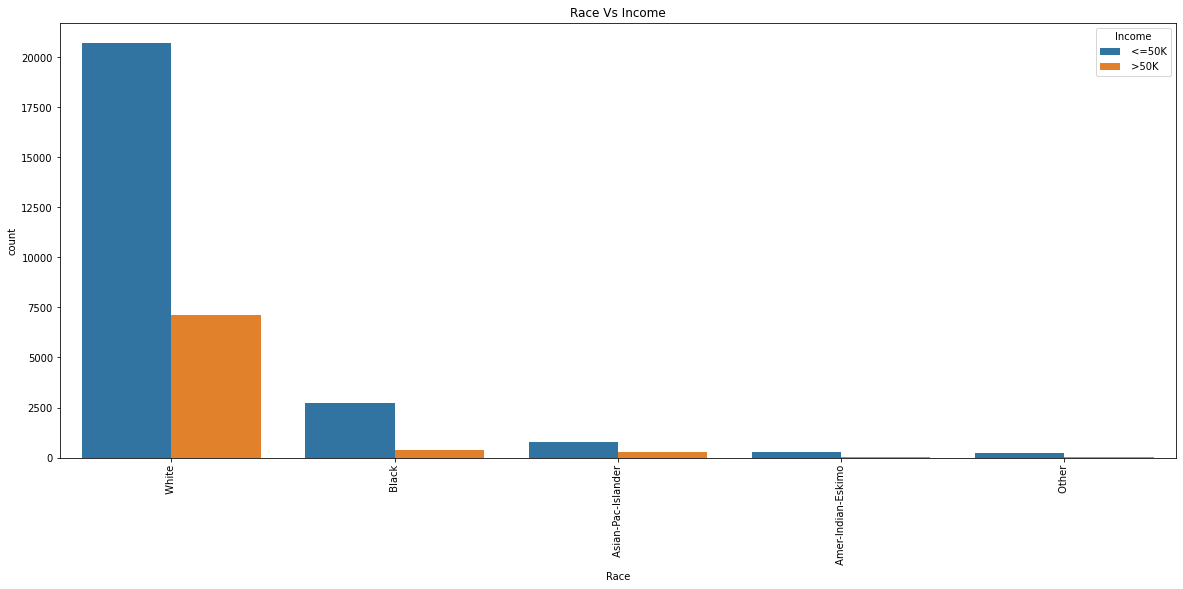

In [563]:
plt.figure(figsize= (20,8))
plt.title("Race Vs Income")
sns.countplot(x=data["Race"], hue=data["Income"], order = data["Race"].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

White Race group has higher population and willing to earn much.

###### Gender Vs Income :

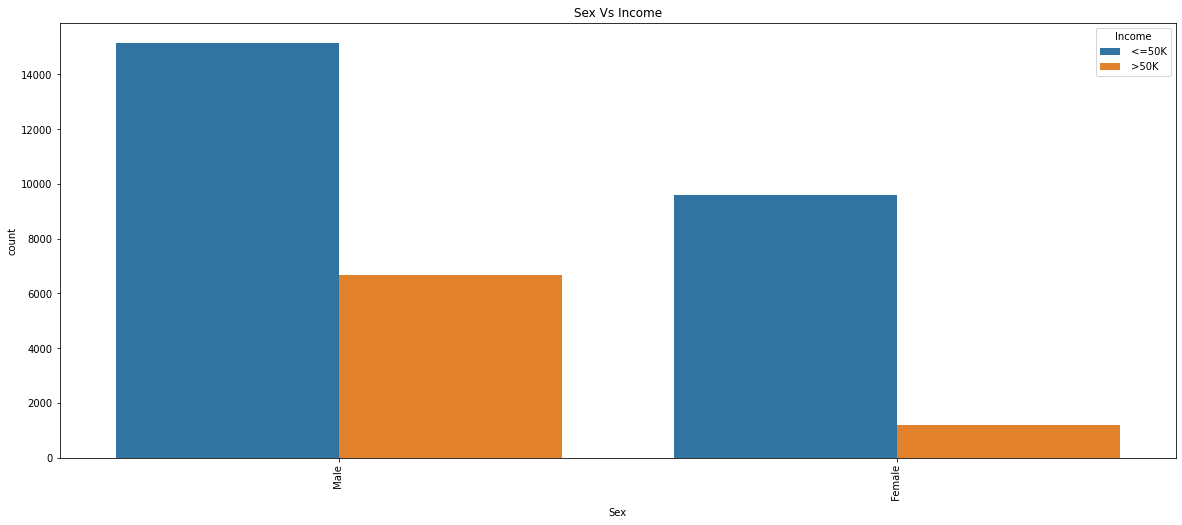

In [564]:
plt.figure(figsize= (20,8))
plt.title("Sex Vs Income")
sns.countplot(x=data["Sex"], hue=data["Income"], order = data["Sex"].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

There seems to be a Wage gap between Male and Female. Male are earning more than double as that of Felmale.

###### Hours_per_week Vs Income :

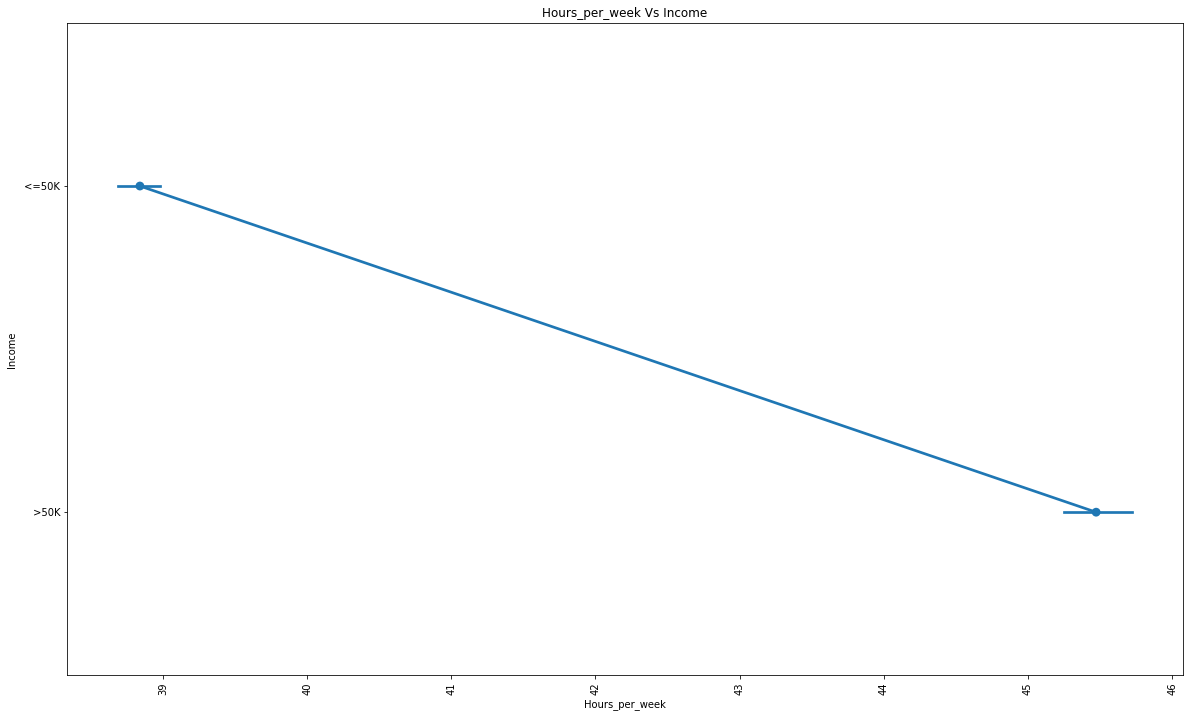

In [565]:
plt.figure(figsize= (20,12))
plt.title("Hours_per_week Vs Income")
sns.pointplot(x=data["Hours_per_week"], y=data["Income"])
plt.xticks(rotation='vertical')
plt.show()

We can observe that the income increases as the working hours increases.

###### Native_country Vs Income :

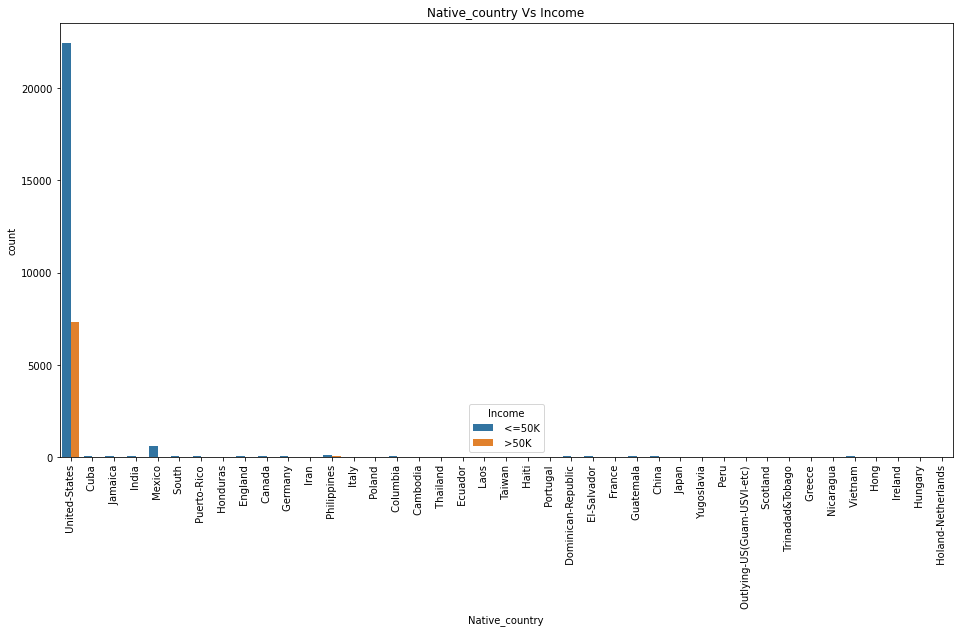

In [566]:
plt.figure(figsize= (16,8))
plt.title("Native_country Vs Income")
sns.countplot(x=data["Native_country"], hue=data["Income"], )
plt.xticks(rotation='vertical')
plt.show()

In [567]:
#Lets Drop all the unwanted columns from our datase
data.drop(["Education","Fnlwgt"], axis=1, inplace=True)

In [568]:
data.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [569]:
data.keys()

Index(['Age', 'Workclass', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

###### Box plot on continous feature variables : 

Age                  AxesSubplot(0.125,0.125;0.110714x0.755)
Education_num     AxesSubplot(0.257857,0.125;0.110714x0.755)
Capital_gain      AxesSubplot(0.390714,0.125;0.110714x0.755)
Capital_loss      AxesSubplot(0.523571,0.125;0.110714x0.755)
Hours_per_week    AxesSubplot(0.656429,0.125;0.110714x0.755)
dtype: object

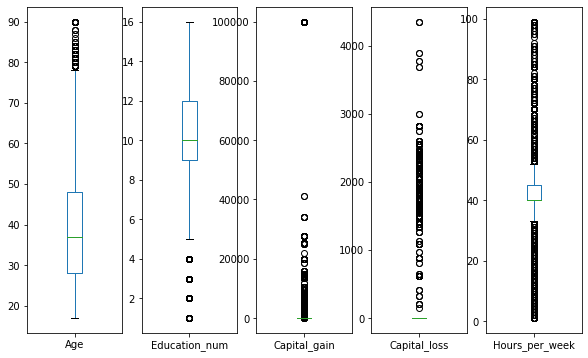

In [570]:
data.plot(kind='box',subplots=True,layout=(1,6), figsize=(12,6))

Lets keep all these datapoints which affectes the mean. these will be stored and applied to test data later.

###### Encoding:
Lets encode all the categorical values to check the correlation between the feature and target variable.

In [571]:
data.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [572]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [573]:
data.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0


###### Correlation Matrix:
Now we have the complete data. Lets see the correlation between the feature sets and Target variable

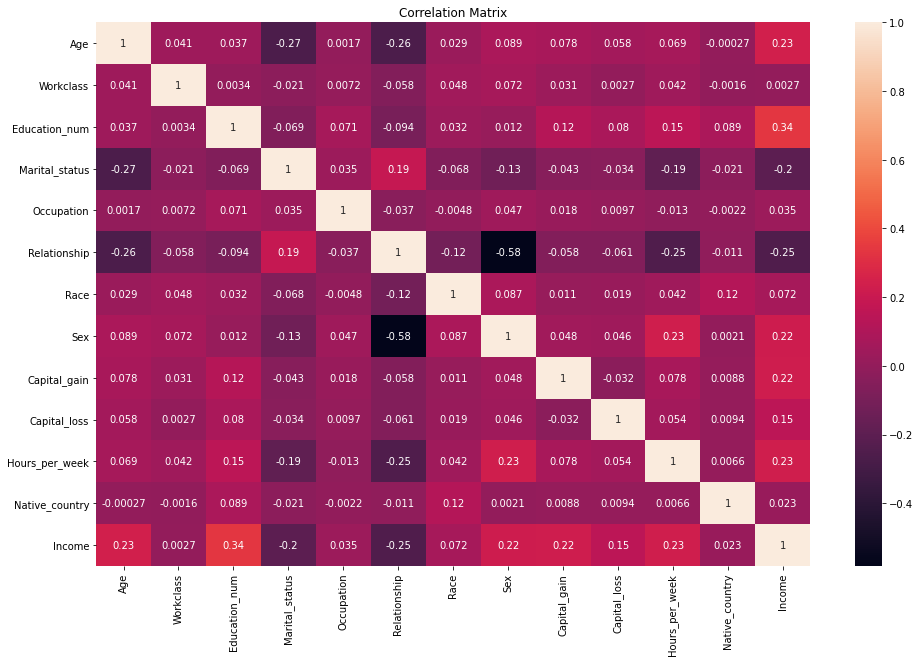

In [574]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

In [575]:
display(data.corr())

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Education_num,0.036527,0.003445,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995
Capital_gain,0.077674,0.031496,0.122627,-0.043398,0.018028,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.008818,0.223333
Capital_loss,0.057775,0.002662,0.079932,-0.034182,0.009670,-0.061064,0.018902,0.045572,-0.031614,1.000000,0.054256,0.009402,0.150523


    We see that none of the columns are highly correlated.
    Education number was extracted from Education Column, hence we dropped education column.
    Fnlwgt column is used for census purpose and there is no information for us, hence it is dropped this column as well for our model building.

In [578]:
#lets split the data into x and y
x=data.drop(["Income"], axis=1)
y=data["Income"]

In [579]:
x.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0
1,38,3.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0
2,53,3.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0
3,28,3.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0
4,37,3.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0


In [584]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Education_num   32560 non-null  int64  
 3   Marital_status  32560 non-null  float64
 4   Occupation      32560 non-null  float64
 5   Relationship    32560 non-null  float64
 6   Race            32560 non-null  float64
 7   Sex             32560 non-null  float64
 8   Capital_gain    32560 non-null  int64  
 9   Capital_loss    32560 non-null  int64  
 10  Hours_per_week  32560 non-null  int64  
 11  Native_country  32560 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 3.0 MB


In [586]:
y.describe()

count    32560.000000
mean         0.240817
std          0.427586
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Income, dtype: float64

###### Standard Scalar:
    Lets scale our feature dataset to bring all the datapoints to similar scale.

In [595]:
from sklearn.preprocessing import StandardScaler

SS=StandardScaler()

x_ss=SS.fit_transform(x)

x=pd.DataFrame(x_ss, columns=x.columns)
x.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,1.721336,1.134779,-0.406183,-0.790156,-0.900177,0.393675,0.703087,-0.145914,-0.216663,-2.22212,0.261374
1,-0.042640,-0.085223,-0.420027,-1.734026,-0.286703,-0.277810,0.393675,0.703087,-0.145914,-0.216663,-0.03543,0.261374
2,1.057031,-0.085223,-1.197429,-0.406183,-0.286703,-0.900177,-1.962583,0.703087,-0.145914,-0.216663,-0.03543,0.261374
3,-0.775755,-0.085223,1.134779,-0.406183,0.720204,2.211658,-1.962583,-1.422298,-0.145914,-0.216663,-0.03543,-5.352855
4,-0.115952,-0.085223,1.523480,-0.406183,-0.790156,2.211658,0.393675,-1.422298,-0.145914,-0.216663,-0.03543,0.261374


###### Finding the best random state :

In [603]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAcc=0
maxRS=0

for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Acc :",maxAcc, "\n Best RS :", maxRS)

Best Acc : 0.8384520884520884 
 Best RS : 279


###### Train Test Split :
    Lets split our dataset into train and test data

In [604]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=279)

###### Model Building :

In [605]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [606]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()

model=[lr, dtc, knn, svc, gnb]

In [607]:
for m in model:
    m.fit(x_train, y_train)
    pred_m=m.predict(x_test)
    acc_m=accuracy_score(y_test, pred_m)
    fpr,tpr,thresholds=roc_curve(y_test,pred_m)
    auc_score=roc_auc_score(y_test,pred_m)
    print('Accuracy Score of',m,'is :',acc_m)
    print("Confusion_Matrix",confusion_matrix(y_test,pred_m))
    print("Classification_Report", classification_report(y_test,pred_m))
    print("auc_score", auc_score)
    print('\n')

Accuracy Score of LogisticRegression() is : 0.8384520884520884
Confusion_Matrix [[4774  289]
 [ 763  686]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      5063
         1.0       0.70      0.47      0.57      1449

    accuracy                           0.84      6512
   macro avg       0.78      0.71      0.73      6512
weighted avg       0.83      0.84      0.83      6512

auc_score 0.7081745847729238


Accuracy Score of DecisionTreeClassifier() is : 0.8171068796068796
Confusion_Matrix [[4452  611]
 [ 580  869]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      5063
         1.0       0.59      0.60      0.59      1449

    accuracy                           0.82      6512
   macro avg       0.74      0.74      0.74      6512
weighted avg       0.82      0.82      0.82      6512

auc_score 0.739522254241144


Accuracy Score of KNeig

SVC model has highest accuracy score of 86% and AUC Score of 74.70%

###### Cross Validation :

In [609]:
from sklearn.model_selection import cross_val_score

model=[lr, dtc, knn, svc, gnb]

for m in model:
    cvs=cross_val_score(m,x,y,cv=10)
    print(cvs )
    print("accuracy of the model", m, "is ",cvs.mean())
    print("\n")

[0.81910319 0.82493857 0.82371007 0.8215602  0.82585995 0.83108108
 0.81449631 0.83108108 0.83077396 0.82555283]
accuracy of the model LogisticRegression() is  0.8248157248157248


[0.80712531 0.81511057 0.81572482 0.81418919 0.8203317  0.80712531
 0.81603194 0.82954545 0.82002457 0.81296069]
accuracy of the model DecisionTreeClassifier() is  0.8158169533169535


[0.82862408 0.82585995 0.84428747 0.82985258 0.83445946 0.8289312
 0.83384521 0.83630221 0.8482801  0.82678133]
accuracy of the model KNeighborsClassifier() is  0.8337223587223587


[0.83845209 0.84981572 0.85565111 0.83937346 0.84367322 0.85411548
 0.84735872 0.85995086 0.8519656  0.84735872]
accuracy of the model SVC() is  0.8487714987714987


[0.80128993 0.8022113  0.79883292 0.80620393 0.80251843 0.80835381
 0.78931204 0.80436118 0.8034398  0.81265356]
accuracy of the model GaussianNB() is  0.8029176904176903




With Cross validation also we found that SVC model is performing better 84.87%

###### Ensemble Technique :

In [611]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()

mod = [abc, gbc, rfc]

for m in mod:
    m.fit(x_train, y_train)
    pred_m=m.predict(x_test)
    acc_m=accuracy_score(y_test, pred_m)
    fpr,tpr,thresholds=roc_curve(y_test,pred_m)
    auc_score=roc_auc_score(y_test,pred_m)
    print('Accuracy Score of',m,'is :',acc_m)
    print("Confusion_Matrix",confusion_matrix(y_test,pred_m))
    print("Classification_Report", classification_report(y_test,pred_m))
    print("auc_score", auc_score)
    print('\n')
    

Accuracy Score of AdaBoostClassifier() is : 0.8687039312039312
Confusion_Matrix [[4789  274]
 [ 581  868]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      5063
         1.0       0.76      0.60      0.67      1449

    accuracy                           0.87      6512
   macro avg       0.83      0.77      0.79      6512
weighted avg       0.86      0.87      0.86      6512

auc_score 0.7724578523168464


Accuracy Score of GradientBoostingClassifier() is : 0.8713144963144963
Confusion_Matrix [[4809  254]
 [ 584  865]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      5063
         1.0       0.77      0.60      0.67      1449

    accuracy                           0.87      6512
   macro avg       0.83      0.77      0.80      6512
weighted avg       0.87      0.87      0.87      6512

auc_score 0.773397769198506


Accuracy Score of R

With GradientBoostingClassifier ensemble method, the performance of the model is better compared to earlier SVC model.
The Accuracy score is 87% with auc score 77.3%. Therefore we will select GradientBoostingClassifier as best model

###### Hyper Parameter Tuning:

In [624]:
from sklearn.model_selection import GridSearchCV

In [625]:
#import warnings
#warnings.filterwarnings("ignore")

In [630]:
param={'criterion' :['friedman_mse', 'mse'],
       'loss' : ['deviance', 'exponential'],
       "learning_rate":[0.001,0.01,0.1],
       "n_estimators":[10,100,200]}

In [631]:
GCV=GridSearchCV(gbc, param, refit=True, cv=10, verbose=2)
GCV.fit(x_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.2s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.001, loss=deviance, n_estimators=10; total time=

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=100; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=100; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=100; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=200; total time=   2.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=200; total time=   2.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=200; total time=   2.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=200; total time=   2.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=200; total time=   2.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, n_estimators=200; total time=   2.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, lo

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=100; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=100; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=100; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=exponential, n_estimators=100; total time=   1.3s
[CV] END criterion=friedman_mse, learning_

[CV] END criterion=mse, learning_rate=0.001, loss=exponential, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.001, loss=exponential, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.001, loss=exponential, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.01, loss=deviance, n_estimators=10; total time=   0.1s
[CV] END criterion=mse, learning_ra

[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   2.9s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   2.8s
[CV] END criterion=mse, learning_rate=0.1, loss=deviance, n_estimators=200; total time=   2.7s
[CV] END criterion=mse, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.1, loss=exponential, n_estimators=10; total time=   0.1s
[CV] END criterion=mse, learning_rate=0.1, los

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [632]:
print("Best Parameters : ",GCV.best_params_)
print("Best Estimator : ",GCV.best_estimator_)

Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 200}
Best Estimator :  GradientBoostingClassifier(n_estimators=200)


In [633]:
GCV_pred=GCV.predict(x_test)
print(classification_report(y_test,GCV_pred))
print("Accuracy Score :",accuracy_score(y_test,GCV_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      5063
         1.0       0.78      0.64      0.70      1449

    accuracy                           0.88      6512
   macro avg       0.84      0.79      0.81      6512
weighted avg       0.88      0.88      0.88      6512

Accuracy Score : 0.879914004914005


Applying test set to the model, we have got 88% of accuracy score. Lets save this model.

###### Saving the best Model (GradientBoostingClassifier) : 

In [634]:
import joblib
joblib.dump(GCV.best_estimator_,"Census_Income.obj")

['Census_Income.obj']